**Import Necessary Libraries**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


**LOAD DATASET**

In [72]:
dataset_path = '/content/COMP1801_Coursework_Dataset.csv'  # Replace with actual path
df = pd.read_csv(dataset_path)

In [73]:
df.head()


,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1469.17,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die
1,1793.64,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment
2,700.60,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment
3,1082.10,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous
4,1838.83,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die


In [74]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   HeatTreatTime   1000 non-null   float64
 7   Nickel%         1000 non-null   float64
 8   Iron%           1000 non-null   float64
 9   Cobalt%         1000 non-null   float64
 10  Chromium%       1000 non-null   float64
 11  smallDefects    1000 non-null   int64  
 12  largeDefects    1000 non-null   int64  
 13  sliverDefects   1000 non-null   int64  
 14  seedLocation    1000 non-null   object 
 15  castType        1000 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 125.1+ KB


,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1298.556320,17.639000,2.764230,5.464600,30.194510,60.243080,24.553580,12.434690,2.768650,17.311000,0.550000,0.292000
std,340.071434,7.491783,1.316979,2.604513,16.889415,5.790475,7.371737,4.333197,1.326496,12.268365,1.163982,1.199239
min,417.990000,5.000000,0.500000,1.030000,1.030000,50.020000,6.660000,5.020000,0.510000,0.000000,0.000000,0.000000
25%,1047.257500,11.000000,1.640000,3.170000,16.185000,55.287500,19.387500,8.597500,1.590000,7.000000,0.000000,0.000000
50%,1266.040000,18.000000,2.755000,5.475000,29.365000,60.615000,24.690000,12.585000,2.865000,18.000000,0.000000,0.000000
75%,1563.050000,24.000000,3.970000,7.740000,44.955000,65.220000,29.882500,16.080000,3.922500,26.000000,0.000000,0.000000
max,2134.530000,30.000000,4.990000,10.000000,59.910000,69.950000,43.650000,19.990000,4.990000,61.000000,4.000000,8.000000


In [75]:
print(df.columns)


Index(['Lifespan', 'partType', 'microstructure', 'coolingRate', 'quenchTime',
       'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%',
       'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects',
       'seedLocation', 'castType'],
      dtype='object')


**Data Exploration**

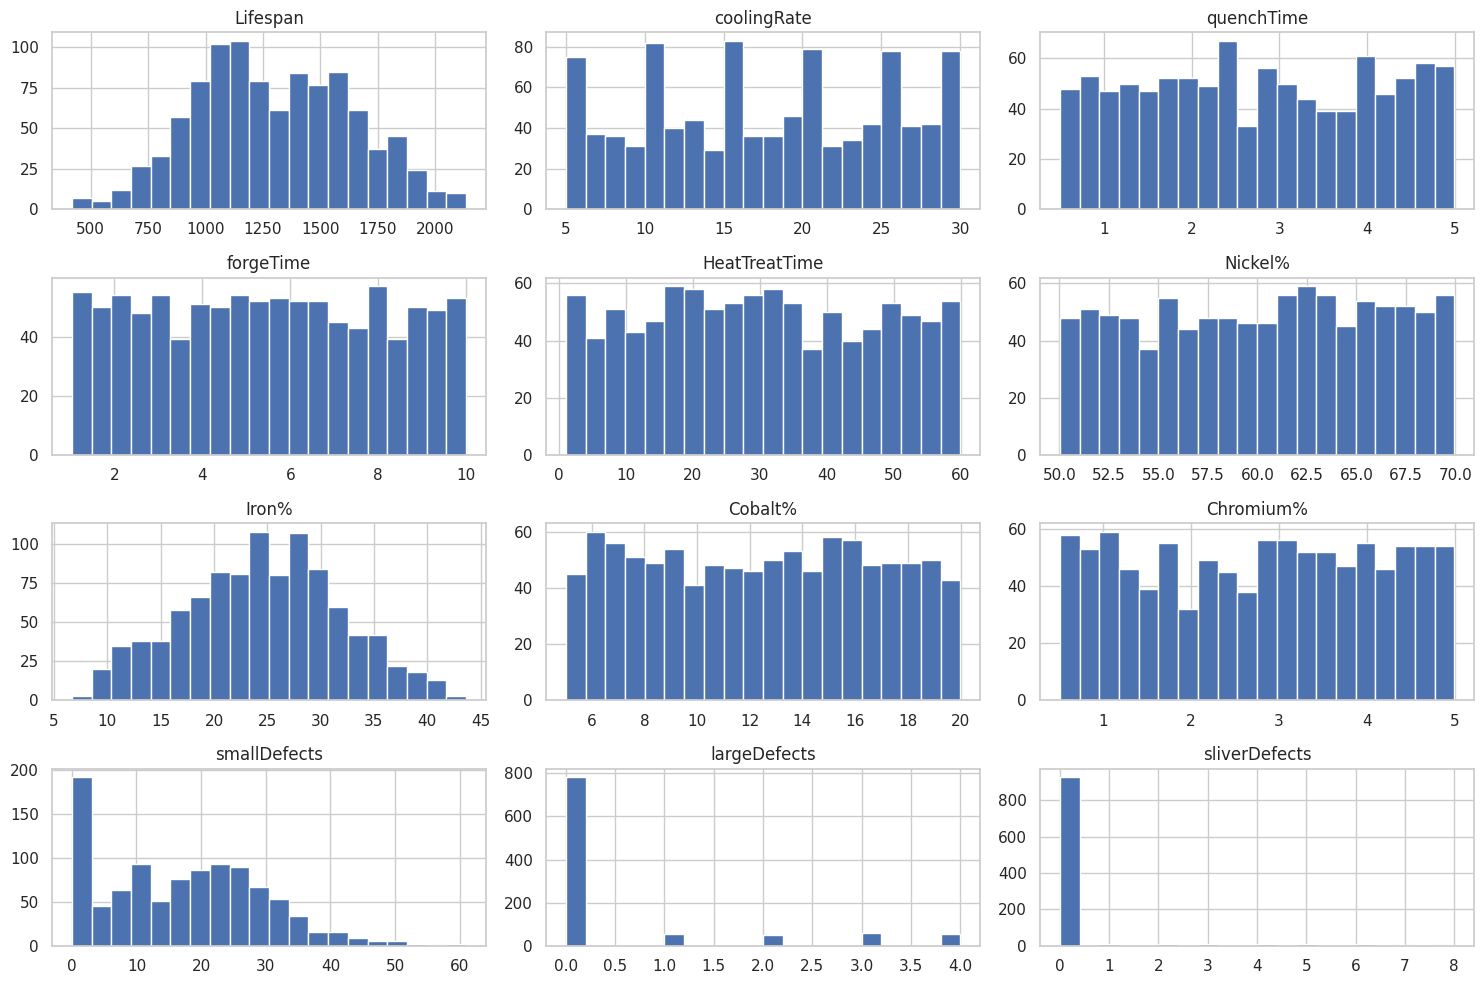

In [76]:
#histograms for numerical columns
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


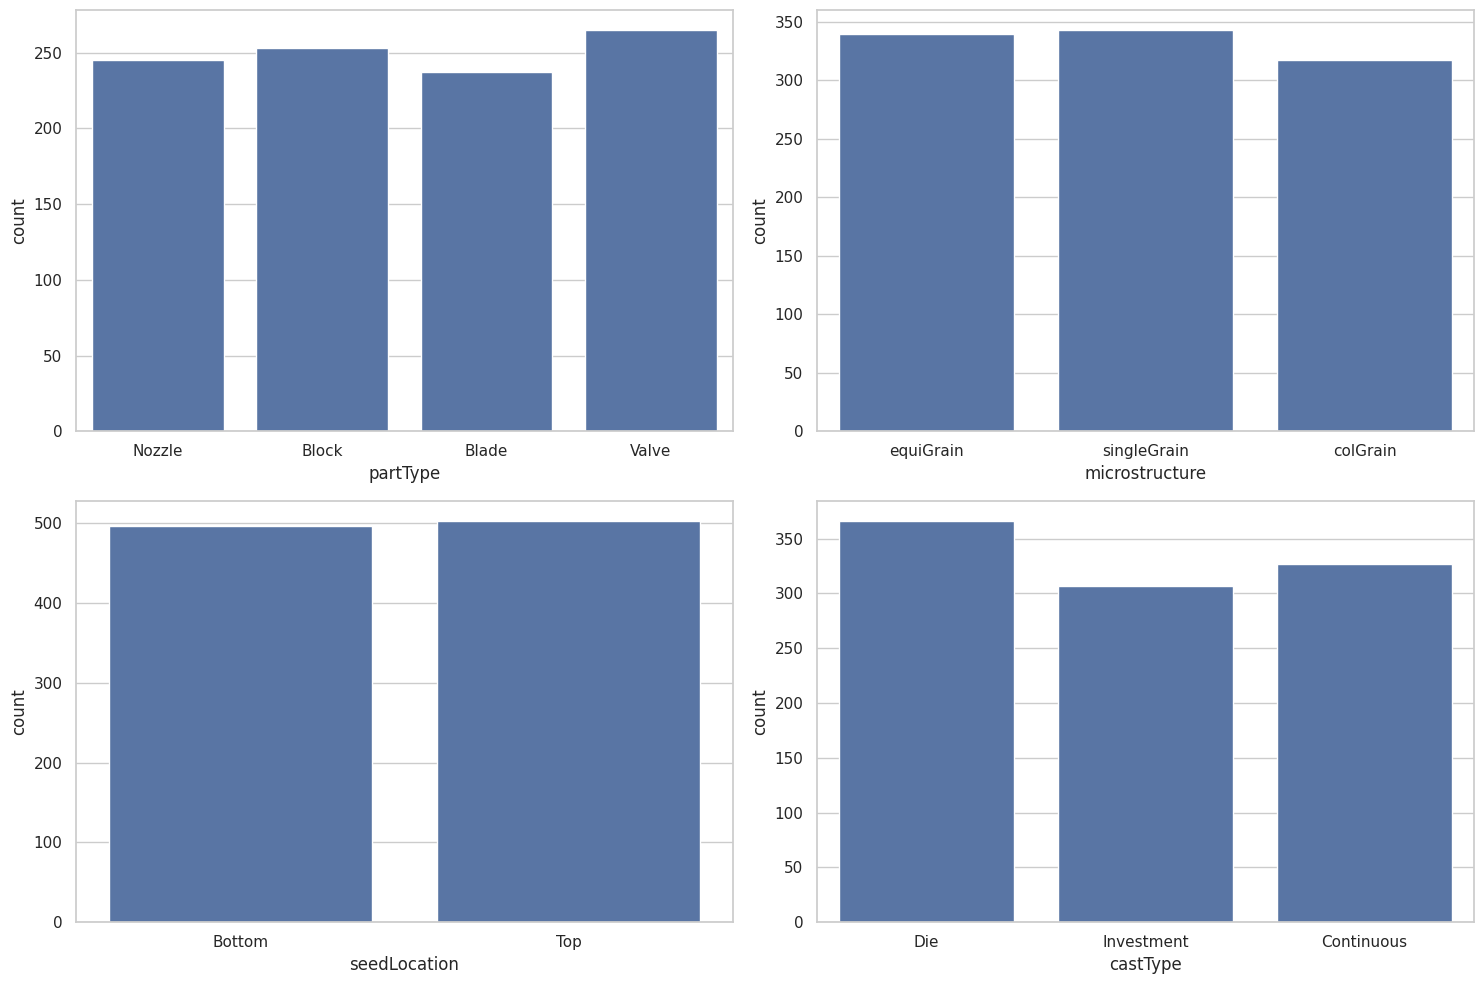

In [77]:
# Import necessary visualization libraries
sns.set(style="whitegrid")

#categorical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(ax=axes[0, 0], x='partType', data=df)
sns.countplot(ax=axes[0, 1], x='microstructure', data=df)
sns.countplot(ax=axes[1, 0], x='seedLocation', data=df)
sns.countplot(ax=axes[1, 1], x='castType', data=df)
plt.tight_layout()
plt.show()


**Preprocessing**

In [78]:
from sklearn.preprocessing import LabelEncoder

# Creating copy of the original DataFrame to keep track of the original values
df_encoded = df.copy()

# Encoding categorical columns using LabelEncoder
label_encoders = {}
categorical_columns = ['partType', 'microstructure', 'seedLocation', 'castType']

for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le




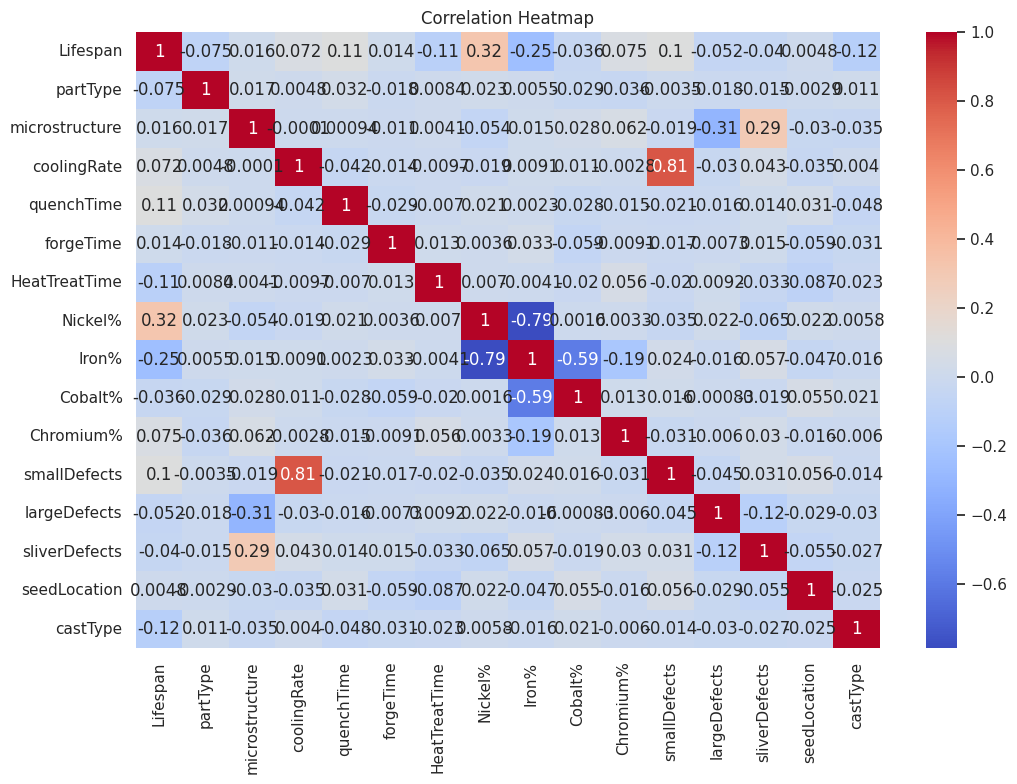

In [79]:
# correlation heatmap including all columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define categorical and numerical columns
categorical_cols = ['partType', 'microstructure', 'seedLocation', 'castType']
numerical_cols = ['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime',
                  'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%',
                  'smallDefects', 'largeDefects', 'sliverDefects']

# ColumnTransformer to apply One-Hot Encoding and Scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Fit and transform the data
X = df.drop(columns=['Lifespan'])
y = df['Lifespan']

X_processed = preprocessor.fit_transform(X)


In [81]:
import numpy as np

# Apply log transformation to skewed features
df['smallDefects'] = df['smallDefects'].apply(lambda x: np.log1p(x))
df['largeDefects'] = df['largeDefects'].apply(lambda x: np.log1p(x))
df['sliverDefects'] = df['sliverDefects'].apply(lambda x: np.log1p(x))


**Splitting Train,Test and Validation set**

In [82]:
from sklearn.model_selection import train_test_split

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


**Model Building**

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on validation set
y_pred_val = lr_model.predict(X_val)

# Evaluate Linear Regression
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"Linear Regression - RMSE: {rmse}, MAE: {mae}, R²: {r2}")


Linear Regression - RMSE: 309.8211602317268, MAE: 263.239, R²: 0.17724324985936646


In [84]:
from sklearn.neural_network import MLPRegressor

# Train Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Predict on validation set
y_pred_nn_val = nn_model.predict(X_val)

# Evaluate Neural Network
rmse_nn = np.sqrt(mean_squared_error(y_val, y_pred_nn_val))
mae_nn = mean_absolute_error(y_val, y_pred_nn_val)
r2_nn = r2_score(y_val, y_pred_nn_val)

print(f"Neural Network - RMSE: {rmse_nn}, MAE: {mae_nn}, R²: {r2_nn}")


Neural Network - RMSE: 312.2623518916146, MAE: 266.1946163482815, R²: 0.1642265805847657


In [85]:
# Predict on the test set using Linear Regression
y_pred_test_lr = lr_model.predict(X_test)

# Evaluate Linear Regression on the test set
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

print(f"Linear Regression - Test Set Evaluation: RMSE: {rmse_test_lr}, MAE: {mae_test_lr}, R²: {r2_test_lr}")


Linear Regression - Test Set Evaluation: RMSE: 308.256251078006, MAE: 260.2119333333333, R²: 0.08548455298785684


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [87]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_rf = rf_model.predict(X_val)

# Evaluate on the validation set
rmse_val_rf = np.sqrt(mean_squared_error(y_val, y_pred_val_rf))
mae_val_rf = mean_absolute_error(y_val, y_pred_val_rf)
r2_val_rf = r2_score(y_val, y_pred_val_rf)

print(f"Random Forest - Validation Set Evaluation: RMSE: {rmse_val_rf}, MAE: {mae_val_rf}, R²: {r2_val_rf}")


Random Forest - Validation Set Evaluation: RMSE: 79.84928373575096, MAE: 62.17729933333326, R²: 0.9453498508341751


In [88]:
# Predict on the test set using Random Forest
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate Random Forest on the test set
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"Random Forest - Test Set Evaluation: RMSE: {rmse_test_rf}, MAE: {mae_test_rf}, R²: {r2_test_rf}")


Random Forest - Test Set Evaluation: RMSE: 98.14016059182661, MAE: 76.21511799999993, R²: 0.9073040436541067


**Hyper Parameter tuning Of Random Forest Refressor**

In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search with Cross-Validation
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                      n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

# Best parameters from the random search
best_params = rf_random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model found to evaluate on the test set
best_rf_model = rf_random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate on the test set with the tuned model
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest - Test Set Evaluation: RMSE: {rmse_best_rf}, MAE: {mae_best_rf}, R²: {r2_best_rf}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Tuned Random Forest - Test Set Evaluation: RMSE: 96.57878798902732, MAE: 74.57360168299249, R²: 0.9102300955960292


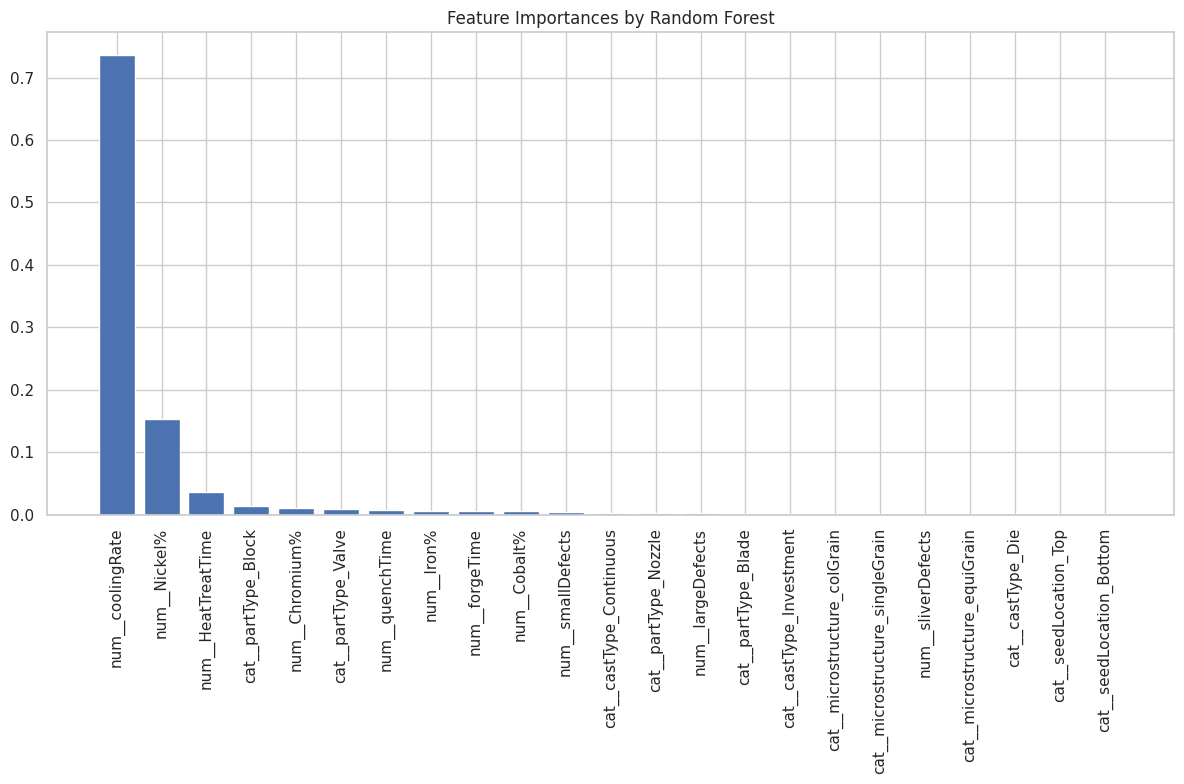

In [90]:
import matplotlib.pyplot as plt

# Get
importances = rf_model.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]
feature_names = preprocessor.get_feature_names_out()

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importances by Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [91]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=5000, random_state=42)

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict on validation set
y_pred_val_mlp = mlp_model.predict(X_val)

# Evaluate on the validation set
rmse_val_mlp = np.sqrt(mean_squared_error(y_val, y_pred_val_mlp))
mae_val_mlp = mean_absolute_error(y_val, y_pred_val_mlp)
r2_val_mlp = r2_score(y_val, y_pred_val_mlp)

print(f"MLP Regressor - Validation Set Evaluation: RMSE: {rmse_val_mlp}, MAE: {mae_val_mlp}, R²: {r2_val_mlp}")

# Predict on test set
y_pred_test_mlp = mlp_model.predict(X_test)

# Evaluate on the test set
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_pred_test_mlp))
mae_test_mlp = mean_absolute_error(y_test, y_pred_test_mlp)
r2_test_mlp = r2_score(y_test, y_pred_test_mlp)

print(f"MLP Regressor - Test Set Evaluation: RMSE: {rmse_test_mlp}, MAE: {mae_test_mlp}, R²: {r2_test_mlp}")


MLP Regressor - Validation Set Evaluation: RMSE: 155.9452112561726, MAE: 123.82929935698189, R²: 0.7915540851424223
MLP Regressor - Test Set Evaluation: RMSE: 148.62509365702562, MAE: 121.86125532968974, R²: 0.7874057356254277


In [92]:
pip install shap


**Shap For Feature Importance of Neural network**

  0%|          | 0/50 [00:00<?, ?it/s]

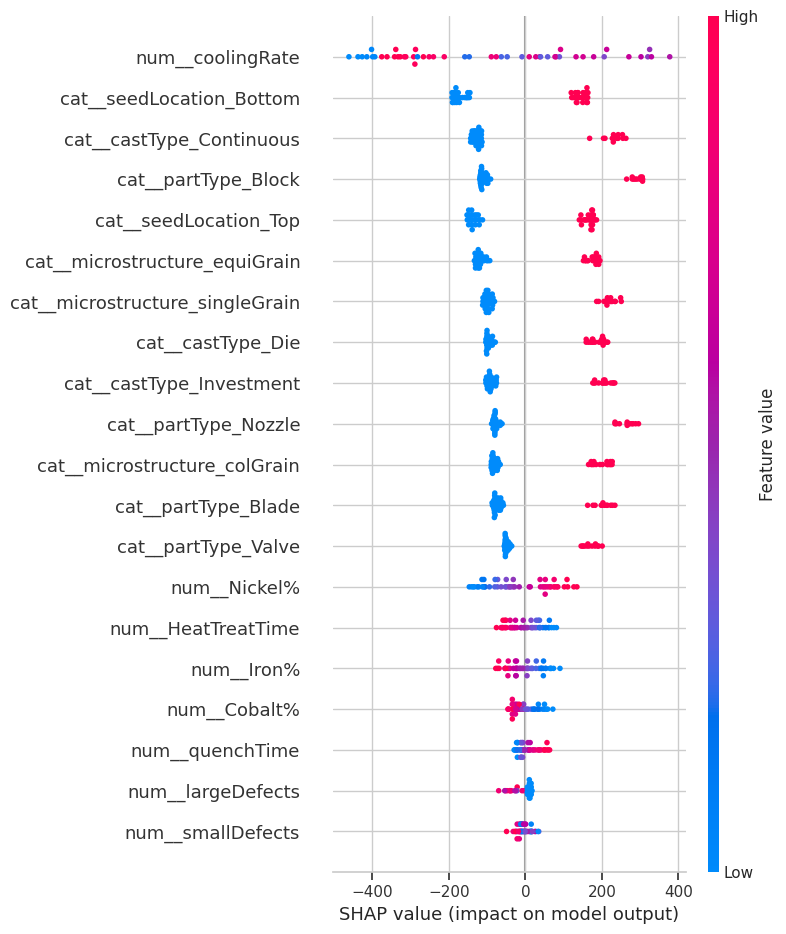

In [93]:
import shap
import numpy as np

# Take a small sample of the training set for SHAP calculations to keep it feasible
X_sample = shap.sample(X_train, 100)  # Randomly sample 100 instances from X_train

# Create a KernelExplainer for the MLP Regressor
explainer = shap.KernelExplainer(mlp_model.predict, X_sample)

# Calculate SHAP values for a subset of the test set (to save on computation time)
X_test_sample = shap.sample(X_test, 50)  # Use a smaller sample from X_test
shap_values = explainer.shap_values(X_test_sample)

# Plot the summary of feature importance using SHAP values
shap.summary_plot(shap_values, X_test_sample, feature_names=preprocessor.get_feature_names_out())


In [94]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor

# Assuming df is your original dataset
X = df.drop(columns=['Lifespan'])
y = df['Lifespan']

# Split the data into train, validation, and test sets (70/15/15 split)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1765, random_state=42)  # 15% of the 85% training data

# Identifying categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Define the pipeline for the entire process
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(max_iter=3000, random_state=42))
])

# Fit the preprocessor to the training data (transformations only)
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%',
       'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects', 'largeDefects',
       'sliverDefects'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['partType', 'microstructure', 'seedLocation', 'castType'], dtype='object'))])),
                ('regressor', MLPRegressor(max_iter=3000, random_state=42))])

In [95]:
# Simplified hyperparameter grid
param_grid = {
    'regressor__hidden_layer_sizes': [(50, 25), (100, 50)],
    'regressor__activation': ['relu'],
    'regressor__solver': ['adam'],
    'regressor__learning_rate': ['constant', 'adaptive'],
    'regressor__alpha': [0.0001, 0.001]
}


**Final Model of Task 1**

In [96]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized Search with a smaller number of iterations
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,  # Number of combinations to try
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the Randomized Search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters from Random Search
best_params = random_search.best_params_
print(f"Best Parameters for Neural Network: {best_params}")

# Use the best model to evaluate on the test set
best_mlp_model = random_search.best_estimator_
y_pred_test = best_mlp_model.predict(X_test)

# Evaluate the tuned model on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Tuned Neural Network - Test Set Evaluation: RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for Neural Network: {'regressor__solver': 'adam', 'regressor__learning_rate': 'constant', 'regressor__hidden_layer_sizes': (100, 50), 'regressor__alpha': 0.0001, 'regressor__activation': 'relu'}
Tuned Neural Network - Test Set Evaluation: RMSE: 138.82320035823295, MAE: 108.10586101367554, R²: 0.8203236649837323


**TASK 2**

In [97]:
#Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [98]:
#Load the Dataset
df = pd.read_csv('/content/COMP1801_Coursework_Dataset.csv')

**Scaling**

In [99]:
# Normalizing the Lifespan feature to ensure K-Means is not affected by scale
scaler = StandardScaler()
df['normalized_Lifespan'] = scaler.fit_transform(df[['Lifespan']])

**Clustering for Multi class Using Elbow Method**

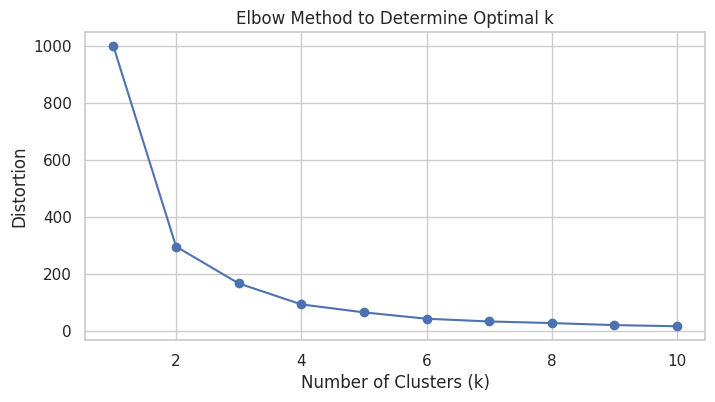

In [100]:
# Determine the Optimal Number of Clusters using the Elbow Method
# Use the Elbow Method to determine the optimal number of clusters
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['normalized_Lifespan']])
    distortions.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [101]:

optimal_k = 3  # Update this based on the Elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Lifespan_group'] = kmeans.fit_predict(df[['normalized_Lifespan']])

In [102]:
# Assign 'Low', 'Medium', 'High' labels based on the cluster centers
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_indices = cluster_centers.argsort()
lifespan_group_mapping = {sorted_indices[0]: 'Low', sorted_indices[1]: 'Medium', sorted_indices[2]: 'High'}
df['Lifespan_group'] = df['Lifespan_group'].map(lifespan_group_mapping)


Minimum and Maximum Lifespan for Each Class:
                    min      max
Lifespan_group                  
High            1483.73  2134.53
Low              417.99  1085.01
Medium          1085.23  1480.43


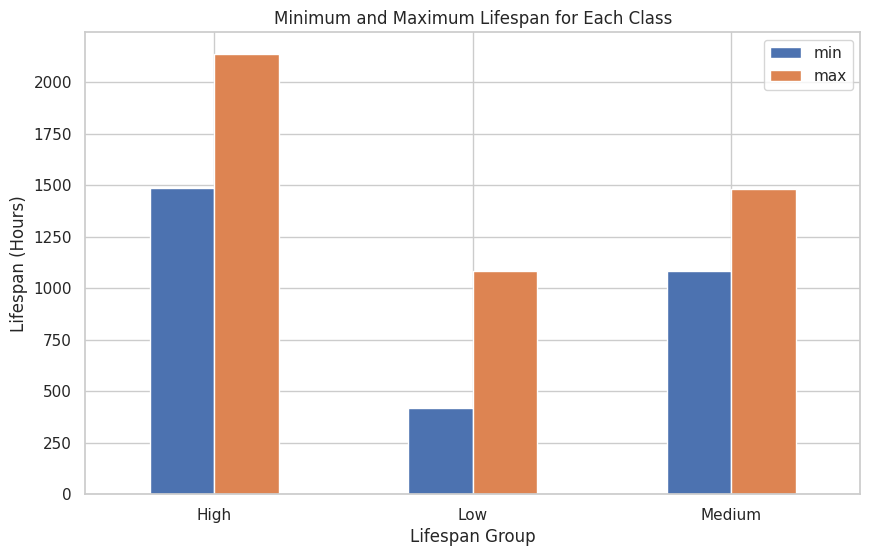

In [103]:
df_with_lifespan = pd.read_csv('/content/COMP1801_Coursework_Dataset.csv')
df_with_lifespan['Lifespan_group'] = kmeans.fit_predict(scaler.fit_transform(df_with_lifespan[['Lifespan']]))
df_with_lifespan['Lifespan_group'] = df_with_lifespan['Lifespan_group'].map(lifespan_group_mapping)

# Calculate min and max for each lifespan group
min_max_per_group = df_with_lifespan.groupby('Lifespan_group')['Lifespan'].agg(['min', 'max'])
print("\nMinimum and Maximum Lifespan for Each Class:")
print(min_max_per_group)

min_max_per_group.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Lifespan Group')
plt.ylabel('Lifespan (Hours)')
plt.title('Minimum and Maximum Lifespan for Each Class')
plt.xticks(rotation=0)
plt.show()

In [104]:
# Drop the Original Lifespan Feature to Avoid Data Leakage
# Drop the 'Lifespan' and 'normalized_Lifespan' columns now that clustering is complete
df = df.drop(columns=['Lifespan', 'normalized_Lifespan'])

# Split the Dataset into Training, Validation, and Test Sets (70/15/15 Split)
# Define features (X) and labels (y)
X = df.drop(columns=['Lifespan_group'])
y = df['Lifespan_group']

# Shuffle the dataset to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [105]:
# Preprocessing - Feature Encoding and Scaling
# Identifying categorical and numerical features
categorical_features = [col for col in X.columns if df[col].dtype == 'object']
numerical_features = [col for col in X.columns if df[col].dtype != 'object']

# Preprocessing for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data and transform training data
X_train = preprocessor.fit_transform(X_train)

# Applying SMOTE to Address Class Imbalance on Training Set Only
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Transform validation and test sets using the already fitted preprocessor
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)


Validation Set Evaluation - Random Forest Model:
Accuracy: 0.7267
Classification Report:
              precision    recall  f1-score   support

        High       0.72      0.81      0.76        47
         Low       0.80      0.80      0.80        44
      Medium       0.68      0.61      0.64        59

    accuracy                           0.73       150
   macro avg       0.73      0.74      0.73       150
weighted avg       0.73      0.73      0.72       150


Test Set Evaluation - Random Forest Model:
Accuracy: 0.8467
Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.88      0.85        48
         Low       0.91      0.91      0.91        43
      Medium       0.82      0.78      0.80        59

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



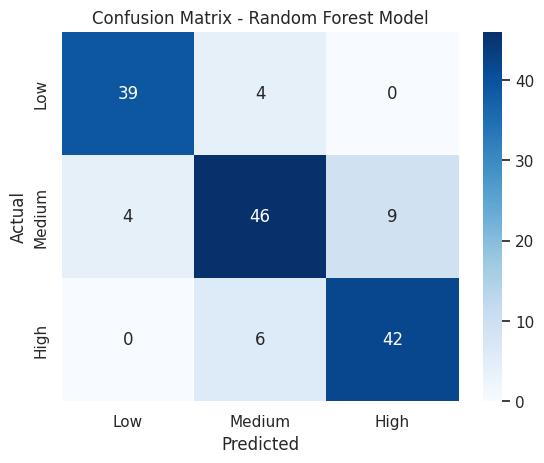


Feature Importance - Random Forest:
                       Feature  Importance
0                  coolingRate    0.240113
8                 smallDefects    0.113303
4                      Nickel%    0.098745
5                        Iron%    0.067173
7                    Chromium%    0.066397
3                HeatTreatTime    0.063345
1                   quenchTime    0.063331
6                      Cobalt%    0.055193
2                    forgeTime    0.049813
14              partType_Valve    0.026168
20         castType_Continuous    0.017395
9                 largeDefects    0.017289
12              partType_Block    0.016060
22         castType_Investment    0.012381
21                castType_Die    0.012258
16    microstructure_equiGrain    0.012077
19            seedLocation_Top    0.012029
15     microstructure_colGrain    0.011609
18         seedLocation_Bottom    0.009852
11              partType_Blade    0.009513
13             partType_Nozzle    0.009333
17  microstructur

In [106]:
# Create Pipelines for Random Forest and Neural Network
# Random Forest Pipeline
rf_model = RandomForestClassifier(random_state=42, max_depth=10)

# Neural Network Pipeline
nn_model = MLPClassifier(max_iter=500, random_state=42, early_stopping=True)

# Train and Evaluate Random Forest Model
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest Model on Validation Set
y_pred_rf_val = rf_model.predict(X_val)
print("\nValidation Set Evaluation - Random Forest Model:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf_val):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred_rf_val))

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nTest Set Evaluation - Random Forest Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=['Low', 'Medium', 'High'])
sns.heatmap(conf_matrix_rf, annot=True, cmap="Blues", fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

# Feature Importance for Random Forest
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance - Random Forest:")
print(feature_importance_df)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Validation Set Evaluation - Neural Network Model:
Accuracy: 0.7067
Classification Report:
              precision    recall  f1-score   support

        High       0.77      0.79      0.78        47
         Low       0.72      0.75      0.73        44
      Medium       0.64      0.61      0.63        59

    accuracy                           0.71       150
   macro avg       0.71      0.72      0.71       150
weighted avg       0.70      0.71      0.71       150


Best Parameters for Neural Network: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant'}

Test Set Evaluation - Neural Network Model:
Accuracy: 0.8067
Classification Report:
              precision    recall  f1-score   support

        High       0.87      0.83      0.85        48
         Low       0.79      0.88      0.84        43
      Medium       0.77      0.73      0.75        59

    accuracy        

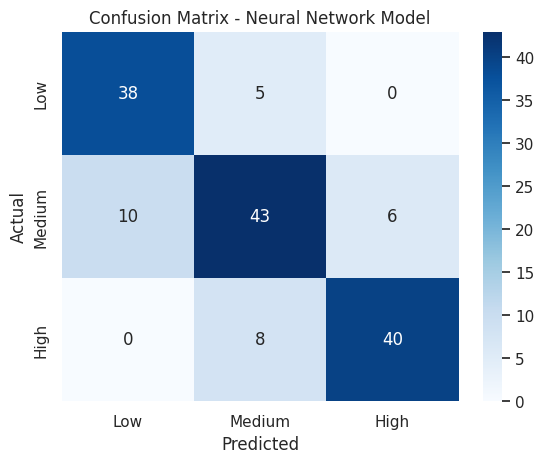


Feature Importance - Neural Network (Permutation Importance):
                       Feature  Importance
0                  coolingRate    0.436667
4                      Nickel%    0.085333
12              partType_Block    0.058000
5                        Iron%    0.055333
3                HeatTreatTime    0.053333
14              partType_Valve    0.039333
20         castType_Continuous    0.038667
8                 smallDefects    0.038667
13             partType_Nozzle    0.030667
1                   quenchTime    0.028667
17  microstructure_singleGrain    0.024667
9                 largeDefects    0.024000
18         seedLocation_Bottom    0.021333
7                    Chromium%    0.018000
6                      Cobalt%    0.015333
16    microstructure_equiGrain    0.015333
21                castType_Die    0.012000
22         castType_Investment    0.009333
10               sliverDefects    0.006667
15     microstructure_colGrain    0.004000
19            seedLocation_Top    

In [107]:
# Hyperparameter Tuning for Neural Network
# Set up hyperparameter grid for tuning the Neural Network
param_grid = {
    'hidden_layer_sizes': [(50,), (100, 50), (150, 100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.001, 0.01, 0.1]
}

# Train the Neural Network using GridSearchCV
nn_grid_search = GridSearchCV(nn_model, param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model with Grid Search
nn_grid_search.fit(X_train, y_train)

# Evaluate the Neural Network Model on Validation Set
y_pred_nn_val = nn_grid_search.best_estimator_.predict(X_val)
print("\nValidation Set Evaluation - Neural Network Model:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_nn_val):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred_nn_val))

# Get the best model from Grid Search
best_nn_model = nn_grid_search.best_estimator_
print(f"\nBest Parameters for Neural Network: {nn_grid_search.best_params_}")

#  Evaluate the Best Neural Network Model
# Predict on the test set using the best model
y_pred_nn = best_nn_model.predict(X_test)

# Evaluate the Neural Network model
print("\nTest Set Evaluation - Neural Network Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Confusion matrix for Neural Network
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn, labels=['Low', 'Medium', 'High'])
sns.heatmap(conf_matrix_nn, annot=True, cmap="Blues", fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network Model')
plt.show()

# Feature Importance for Neural Network
from sklearn.inspection import permutation_importance
nn_importances = permutation_importance(best_nn_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
nn_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': nn_importances.importances_mean})
nn_importance_df = nn_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance - Neural Network (Permutation Importance):")
print(nn_importance_df)